Implementing a VGG-style convolutional neural network for classifying CIFAR-10 image data.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

# Check if GPU is available
if tf.test.is_gpu_available():
    device = '/GPU:0'
else:
    device = '/CPU:0'

display(device)    

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


'/CPU:0'

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Normalize pixel values to the range [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [4]:
# Define the VGG model architecture
with tf.device(device):
  model = keras.Sequential(
      [
          # Convolutional layers
          layers.Conv2D(64, (3, 3), activation="relu", padding="same", input_shape=(32, 32, 3)),
          layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
          layers.MaxPooling2D((2, 2)),
          layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
          layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
          layers.MaxPooling2D((2, 2)),
          layers.Conv2D(256, (3, 3), activation="relu", padding="same"),
          layers.Conv2D(256, (3, 3), activation="relu", padding="same"),
          layers.Conv2D(256, (3, 3), activation="relu", padding="same"),
          layers.MaxPooling2D((2, 2)),
          layers.Conv2D(512, (3, 3), activation="relu", padding="same"),
          layers.Conv2D(512, (3, 3), activation="relu", padding="same"),
          layers.Conv2D(512, (3, 3), activation="relu", padding="same"),
          layers.MaxPooling2D((2, 2)),
          layers.Conv2D(512, (3, 3), activation="relu", padding="same"),
          layers.Conv2D(512, (3, 3), activation="relu", padding="same"),
          layers.Conv2D(512, (3, 3), activation="relu", padding="same"),
          layers.MaxPooling2D((2, 2)),
          # Dense layers
          layers.Flatten(),
          layers.Dense(4096, activation="relu"),
          layers.Dense(4096, activation="relu"),
          layers.Dense(10, activation="softmax"),
       ]
      )
  
  model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                    

In [5]:
# Compile the model
with tf.device(device):
  model.compile(
      optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
      )

In [6]:
# Train the model
with tf.device(device):
  history = model.fit(x_train, y_train, epochs=2, batch_size=64, validation_split=0.1)

Epoch 1/2
704/704 [==============================] - 5482s 8s/step - loss: 2.3029 - accuracy: 0.1011 - val_loss: 2.3028 - val_accuracy: 0.0976
Epoch 2/2
704/704 [==============================] - 5410s 8s/step - loss: 2.3027 - accuracy: 0.0999 - val_loss: 2.3028 - val_accuracy: 0.0958


In [7]:
# Evaluate the model on the test set
with tf.device(device):
  test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

313/313 [==============================] - 132s 423ms/step - loss: 2.3026 - accuracy: 0.1000
Test loss: 2.302605628967285
Test accuracy: 0.10000000149011612


313/313 [==============================] - 135s 429ms/step


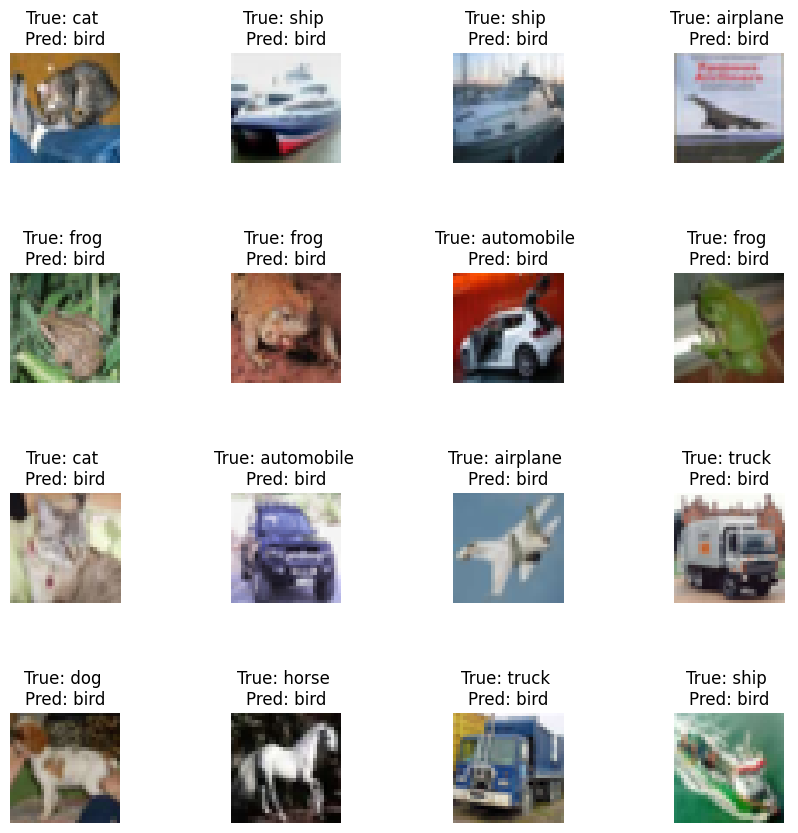

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Get predicted labels for the test set
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Define class names for CIFAR-10 dataset
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

# Create a figure with 16 subplots
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.ravel()

# Plot images with their predicted labels
for i in range(16):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPred: %s" % (class_names[y_test[i][0]], 
                                                class_names[y_pred_labels[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1, hspace=1)
plt.show()